

#**A supervised classification model for term deposit prediction**


###**Abstract**:

####The bank pertaining to the dataset is facing a revenue decline. Knowing that term deposits allow the bank to hold on to a deposit for a fixed time and improve financial gains, they decided to create a machine learning model which predicts the capability of their existing clients to subscribe to a term deposit.

###**Problem Statement**:

####The dataset in our procession is related with the direct marketing campaigns of this banking institution. The classification goal is to predict if the client will subscribe to a term deposit. 



### **Bank client data**:

####Lets take a look at the various feature coloumns:
 
1. Age (numeric)
2. Job : type of job (categorical: ‘admin.’,’blue-collar’,’entrepreneur’,’housemaid’,’management’,’retired’,’self-employed’,’services’,’student’,’technician’,’unemployed’,’unknown’)
3. marital : marital status (categorical: ‘divorced’,’married’,’single’,’unknown’; note: ‘divorced’ means divorced or widowed)
4. education (categorical: ‘basic.4y’,’basic.6y’,’basic.9y’,’high.school’,’illiterate’,’professional.course’,’university.degree’,’unknown’)
5. default: has credit in default? (categorical: ‘no’,’yes’,’unknown’)
6. housing: has housing loan? (categorical: ‘no’,’yes’,’unknown’)
7. loan: has personal loan? (categorical: ‘no’,’yes’,’unknown’)
related with the last contact of the current campaign:
8. contact: contact communication type (categorical: ‘cellular’,’telephone’)
9. month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)
10. day_of_week: last contact day of the week (categorical: ‘mon’,’tue’,’wed’,’thu’,’fri’)
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,’nonexistent’,’success’)
16. emp.var.rate: employment variation rate — quarterly indicator (numeric)
17. cons.price.idx: consumer price index — monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index — monthly indicator (numeric)
19. euribor3m: euribor 3 month rate — daily indicator (numeric)
20. nr.employed: number of employees — quarterly indicator (numeric)

###**Output variable:**
21. y: has the client subscribed a term deposit? (binary: ‘yes’,’no’)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

###**1. Data Collection**

In [2]:
drive.mount('/content/gdrive')
df = pd.read_csv("/content/gdrive/My Drive/project/bank-additional-full.csv", sep=';')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
print('There are', df.shape[0], 'observations and',df.shape[1], 'Features including target "y" in the dataset')

There are 41188 observations and 21 Features including target "y" in the dataset


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### **2. Exploratory Data analysis**

In [7]:
sns.set_theme(style="whitegrid")

In [8]:
# Countplot of target column

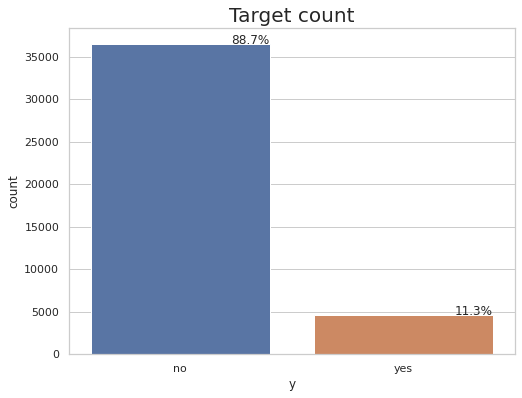

In [9]:
plt.figure(figsize = (8, 6))
target=sns.countplot(x ='y', data = df)
total = float(len(df))
plt.title('Target count', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

This is an imbalanced dataset since 88.7% of target is 'NO' and only 11.3% of target is 'YES'

#### **2.1 Univariate Data Analysis**

In [10]:
#Plotting count of Job Distribution

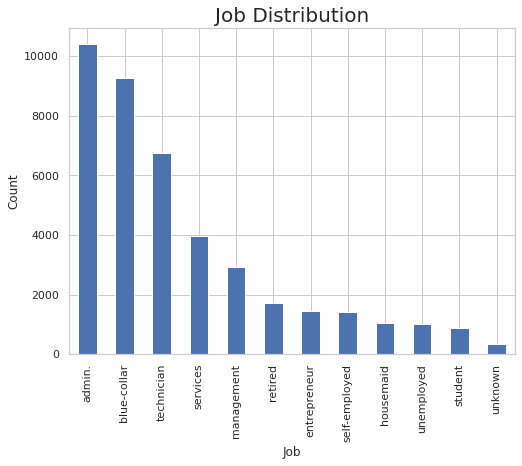

In [11]:
job_count = df['job'].value_counts()
plt.figure(figsize = (8, 6))
job_count.plot(kind = "bar")
plt.title("Job Distribution",fontsize=20)
plt.xlabel("Job")
plt.ylabel("Count")
plt.show()

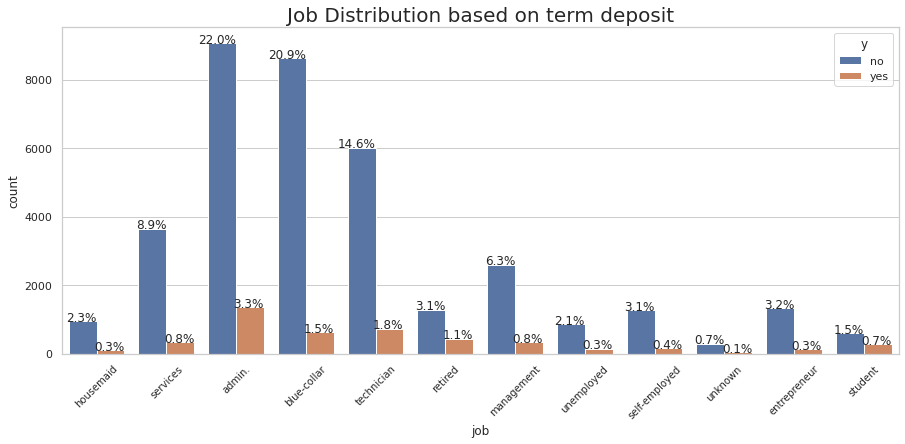

In [12]:
plt.figure(figsize = (15, 6))
target=sns.countplot(x ='job', data = df, hue='y')
total = float(len(df))
plt.title('Job Distribution based on term deposit', fontsize=20)
plt.xticks(rotation = 45,fontsize = 10)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

In the dataset the majority are from Admin, blue collar and technician jobs & most of the term deposit subscibers are also from these categories.

In [13]:
#Plotting count of Marital Distribution

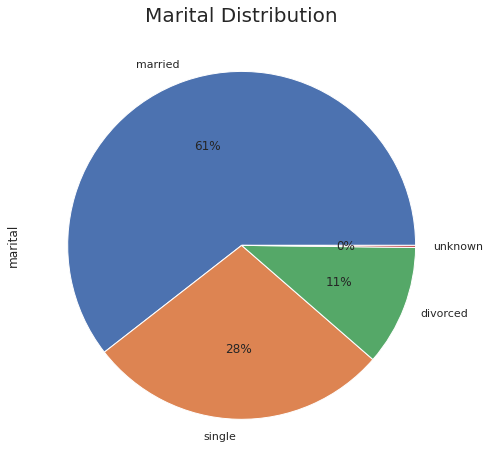

In [14]:
mar_count = df['marital'].value_counts()
plt.figure(figsize = (8, 8))
mar_count.plot(kind = "pie",autopct='%.0f%%')
plt.title("Marital Distribution",fontsize=20)
plt.show()

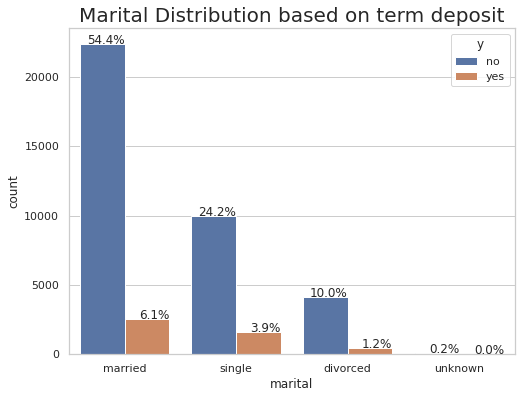

In [15]:
plt.figure(figsize = (8, 6))
target=sns.countplot(x ='marital', data = df, hue='y')
total = float(len(df))
plt.title('Marital Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

As most of the clients are married, both term deposit acceptance and rejection rate is significant among them.

In [16]:
#Plotting count of Credit in default Distribution

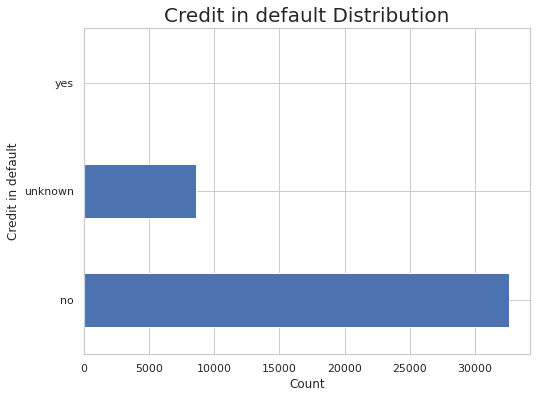

In [17]:
cred_count = df['default'].value_counts()
plt.figure(figsize = (8, 6))
cred_count.plot(kind = "barh")
plt.title("Credit in default Distribution",fontsize=20)
plt.ylabel("Credit in default")
plt.xlabel("Count")
plt.show()

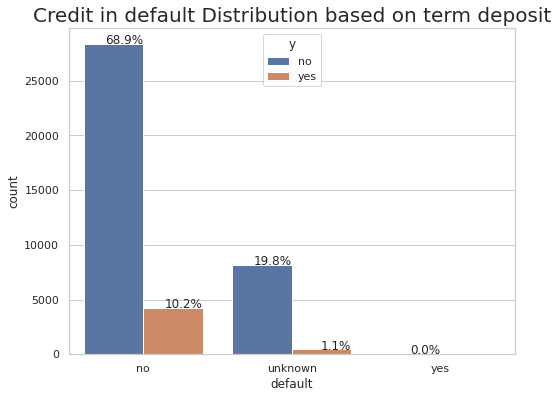

In [18]:
plt.figure(figsize = (8, 6))
target=sns.countplot(x ='default', data = df, hue='y')
total = float(len(df))
plt.title('Credit in default Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

Compared to other features presence of unknown value is more in this particular feature.

In [19]:
#Plotting count of Housing loan Distribution

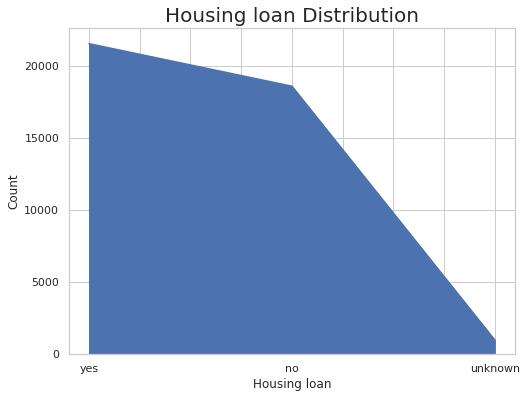

In [20]:
hou_count = df['housing'].value_counts()
plt.figure(figsize = (8, 6))
hou_count.plot(kind = "area")
plt.title("Housing loan Distribution",fontsize=20)
plt.xlabel("Housing loan")
plt.ylabel("Count")
plt.show()

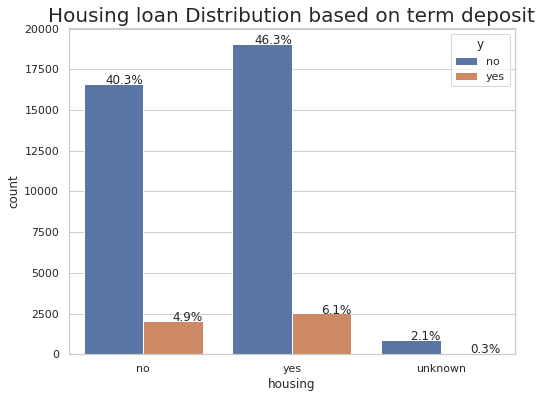

In [21]:
plt.figure(figsize = (8, 6))
target=sns.countplot(x ='housing', data = df, hue='y')
total = float(len(df))
plt.title('Housing loan Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

6.1% clients subscribed tern depoit eventhough they had housing loan.

In [22]:
#Plotting count of Job Distribution of Clients with personal loan

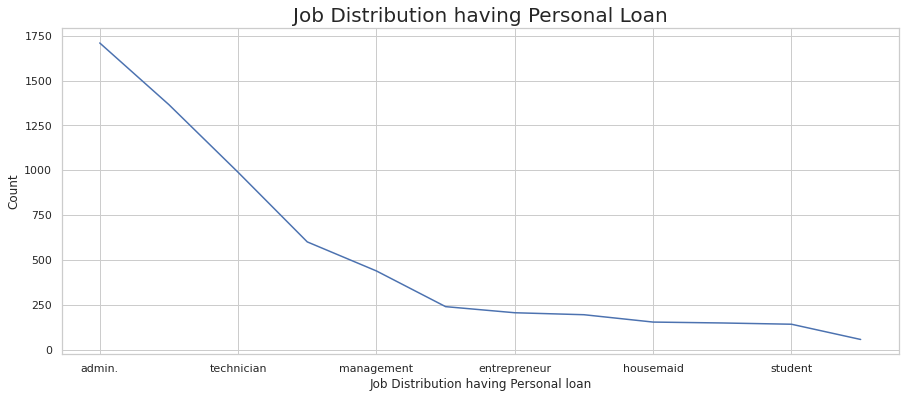

In [23]:
plt.figure(figsize = (15, 6))
job_count_yes = df[df['loan']=='yes']
job_count_y=job_count_yes['job'].value_counts()
job_count_y.plot(kind = "line")
plt.title("Job Distribution having Personal Loan",fontsize=20)
plt.xlabel("Job Distribution having Personal loan")
plt.ylabel("Count")
plt.show()

In [24]:
#Plotting count of Personal loan Distribution

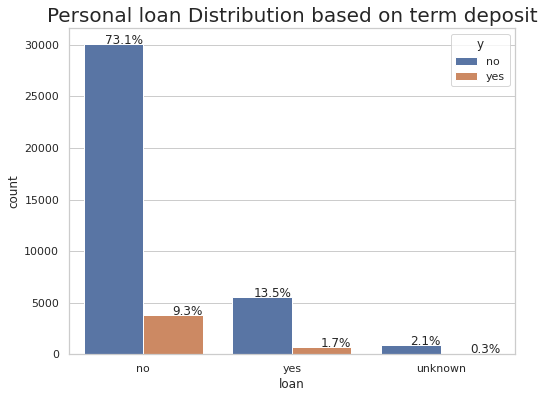

In [25]:
plt.figure(figsize = (8, 6))
target=sns.countplot(x ='loan', data = df, hue='y')
total = float(len(df))
plt.title('Personal loan Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

Most of the people are free from personal loan and at the same time 9.3% subscribed the term deposit from that category.

In [26]:
#Pie-chart of Educational distribution of clients

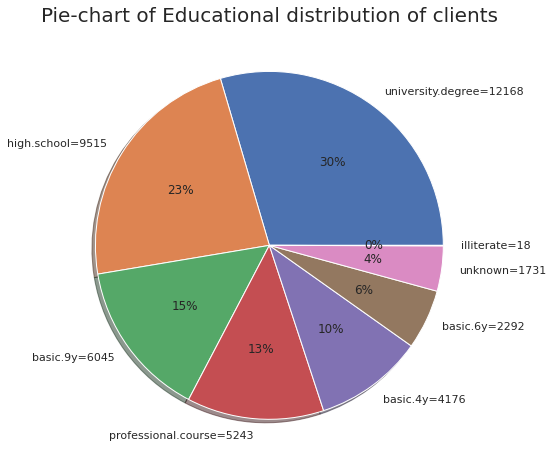

In [27]:
plt.figure(figsize = (8, 8))
education_count = df['education'].value_counts()
plt.pie(education_count, labels=["university.degree=12168","high.school=9515","basic.9y=6045",
"professional.course=5243","basic.4y=4176","basic.6y=2292","unknown=1731","illiterate=18"],autopct='%.0f%%',shadow=True)
plt.title('Pie-chart of Educational distribution of clients',size=20)
plt.show()

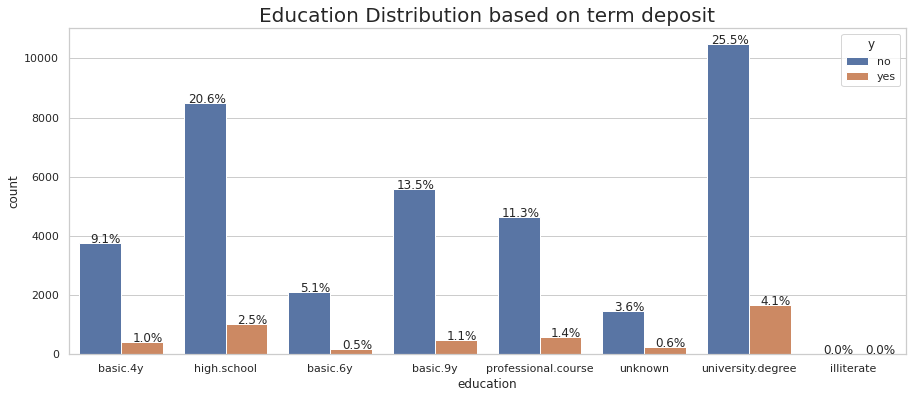

In [28]:
plt.figure(figsize = (15, 6))
target=sns.countplot(x ='education', data = df, hue='y')
total = float(len(df))
plt.title('Education Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

Most of the clients have high school or above education. They constitutes the major part in term deposit subscription. 


In [29]:
#Plotting count of Communication type Distribution

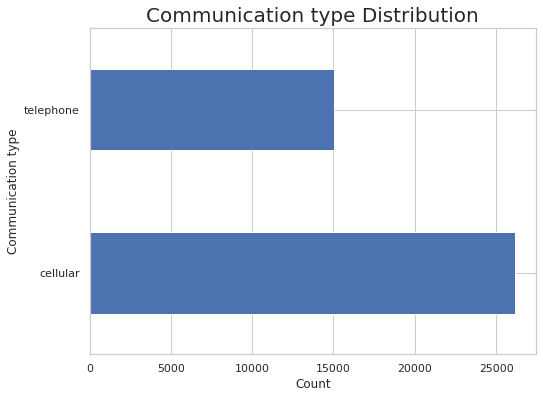

In [30]:
comm_count = df['contact'].value_counts()
plt.figure(figsize = (8, 6))
comm_count.plot(kind = "barh")
plt.title("Communication type Distribution",fontsize=20)
plt.ylabel("Communication type")
plt.xlabel("Count")
plt.show()

In [31]:
#Plotting count of Last contact month Distribution

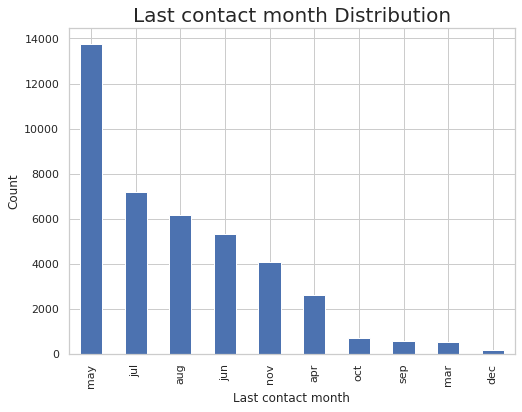

In [32]:
mon_count = df['month'].value_counts()
plt.figure(figsize = (8, 6))
mon_count.plot(kind = "bar")
plt.title("Last contact month Distribution",fontsize=20)
plt.xlabel("Last contact month")
plt.ylabel("Count")
plt.show()

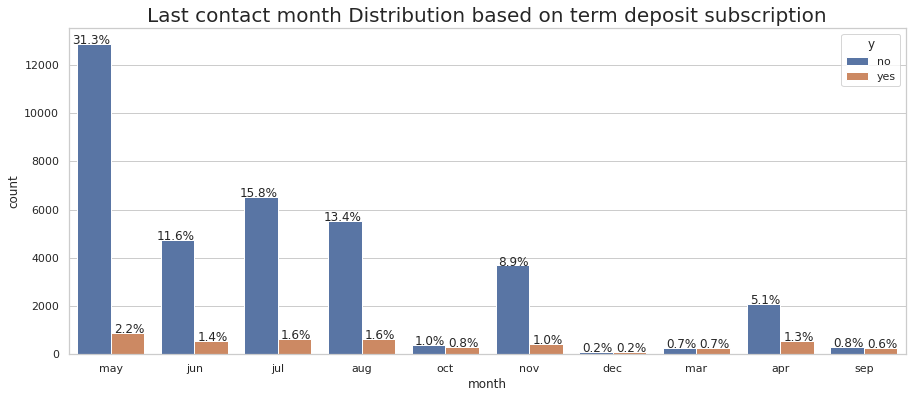

In [33]:
plt.figure(figsize = (15, 6))
target=sns.countplot(x ='month', data = df, hue='y')
total = float(len(df))
plt.title('Last contact month Distribution based on term deposit subscription', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

Eventhough the campaigning was meagre during the months october, december, march and september, we can see that the campaigning was effective as the rate of term deposit subscription  is almost equal to the non subscription. In other months the difference between subscription and non subscription is very high.

In [34]:
#Plotting count of the Last contact day of week Distribution

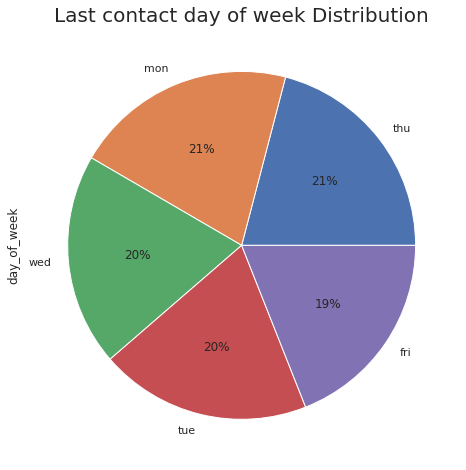

In [35]:
day_count = df['day_of_week'].value_counts()
plt.figure(figsize = (8, 8))
day_count.plot(kind = "pie",autopct='%.0f%%')
plt.title("Last contact day of week Distribution",fontsize=20)
plt.show()

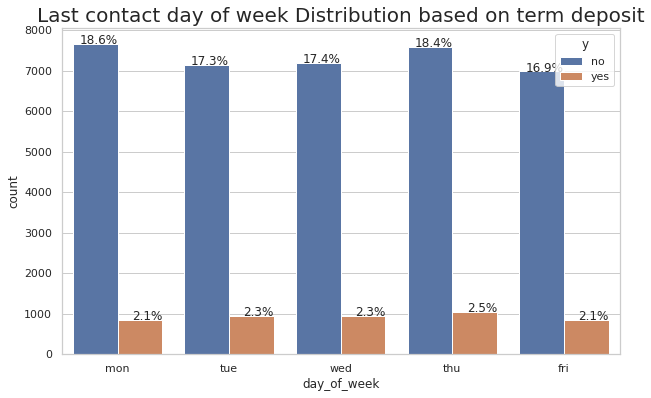

In [36]:
plt.figure(figsize = (10, 6))
target=sns.countplot(x ='day_of_week', data = df, hue='y')
total = float(len(df))
plt.title('Last contact day of week Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

The categorical feature last day of contact has no role in term deposit subscription.

In [37]:
#Plotting count of the Outcome of the previous marketing campaign Distribution

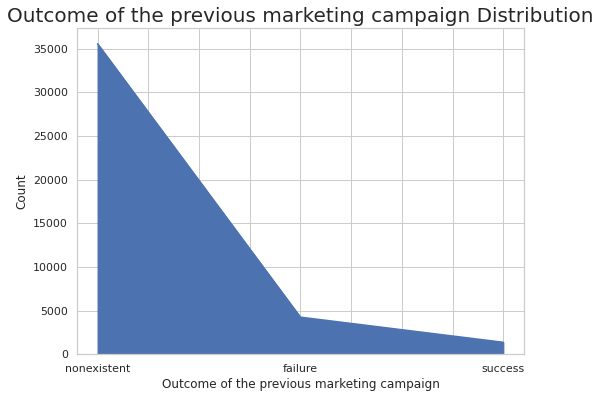

In [38]:
pout_count = df['poutcome'].value_counts()
plt.figure(figsize = (8, 6))
pout_count.plot(kind = "area")
plt.title("Outcome of the previous marketing campaign Distribution",fontsize=20)
plt.xlabel("Outcome of the previous marketing campaign")
plt.ylabel("Count")
plt.show()

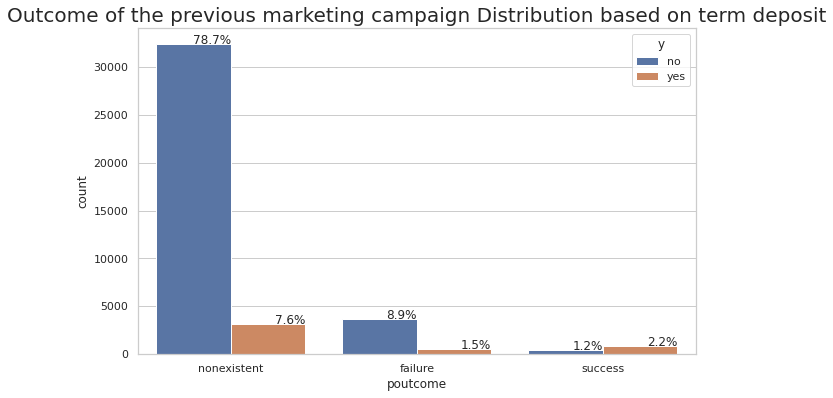

In [39]:
plt.figure(figsize = (10, 6))
target=sns.countplot(x ='poutcome', data = df, hue='y')
total = float(len(df))
plt.title('Outcome of the previous marketing campaign Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

The chance of attaining subscription to a new term deposit is higher for  clients who have subscribed term deposit in previous campaigns. Nearly 10% of clients who did not attend the previous campaign has subscribed the term deposit.

### **2.2 Bivariate Data Analysis**

In [40]:
#Plotting 'Duration' vs 'campaign'

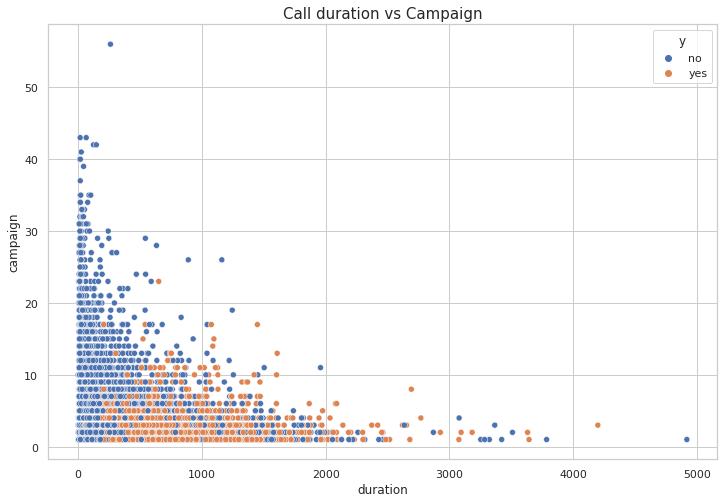

In [41]:
plt.figure(figsize = (12, 8))
plt.title('Call duration vs Campaign',size=15)
sns.scatterplot(data=df, x='duration', y ='campaign', hue='y')
plt.show()

There is an increase in tendency to take term deposit with the increase in call duration. As the number of contacts performed increases the chance of subscription decreases.

In [42]:
#Plotting 'Job' vs 'age'

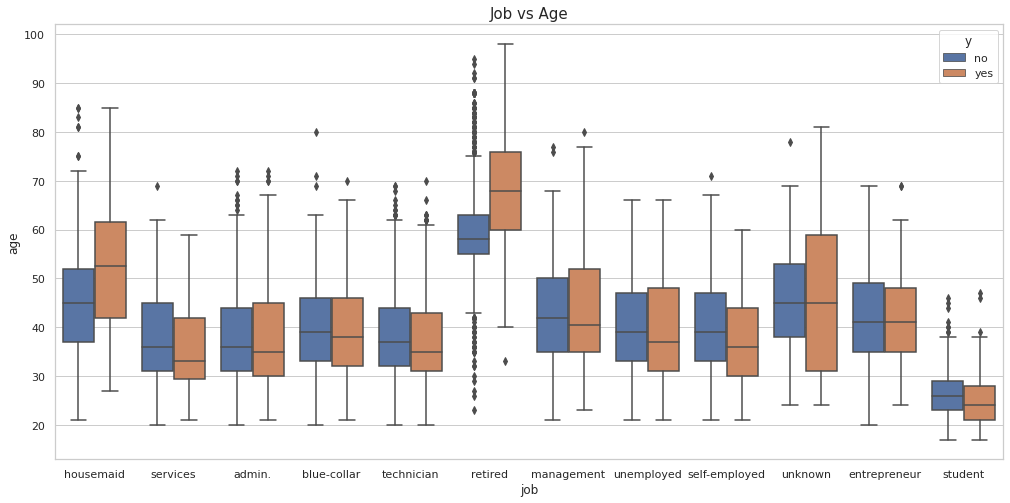

In [43]:
plt.figure(figsize = (17, 8))
sns.boxplot(data=df, x='job', y='age',hue='y')
plt.title('Job vs Age',size=15)
plt.show()

Median age of the clients are in between 30 and 50.

In [44]:
#Plotting 'previous' vs 'duration'

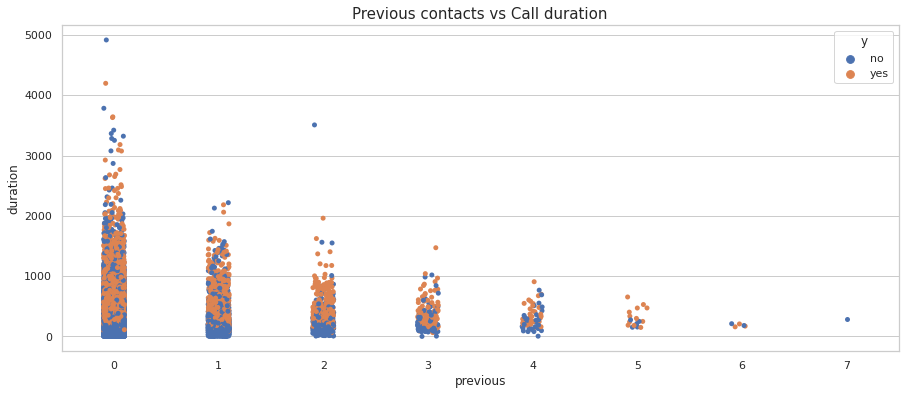

In [45]:
plt.figure(figsize = (15, 6))
plt.title('Previous contacts vs Call duration',size=15)
sns.stripplot(x='previous',y= "duration",hue='y', data=df)
plt.show()

Term deposit subscription depends on call duration rather than number of contacts perfomed before this campaign. 

In [46]:
#Plotting 'age' vs 'duration'

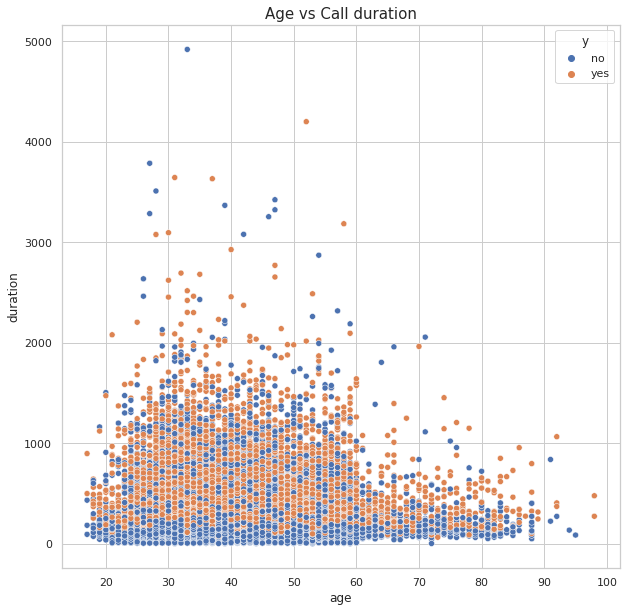

In [47]:
plt.figure(figsize=(10,10))
plt.title('Age vs Call duration',size=15)
sns.scatterplot(x ='age',y= 'duration',hue='y', data=df)
plt.show()

Age has no specific dependance on term deposit subscription. It depends mainly on call duration. 